# Process datasets to generate graphs

In [2]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import guitarpro as gp
from collections import defaultdict
import copy
import os
import pickle

from custom_functions import *

In [3]:
def normalize_outedges(G):
    '''
    Manually normalize the out-edges of the graph
    '''
    for node, degree in dict(G.out_degree()).items():

        sum_weights = np.sum([G.edges[edge[0], edge[1]]['weight'] for edge in G.out_edges(node)])

        for edge in G.out_edges(node):
            G.edges[edge[0], edge[1]]['weight'] /= sum_weights
        
    return G
    

## Processing - memoryless

In [4]:
Graphs_by_key = defaultdict(nx.DiGraph)

In [5]:
Graphs_by_key['CMajor'].nodes

NodeView(())

In [6]:
folder = 'Data/'

In [7]:
listfiles = os.listdir(folder)
listfiles.sort() 

for file in listfiles:
    try:
        song = gp.parse(folder + file, encoding='UTF-8')
    except UnicodeDecodeError:
        print("!! file", file, "can't be parsed !!")
    ntracks, key, frac = get_song_attrs(song)
    
    print(file, key, frac)
    
    if ntracks == 1: 
        G = construct_chain(song, create_using=Graphs_by_key[key])
        Graphs_by_key[key] = G
    else:
        print('\tSkipped - #tracks:', ntracks)
    
G = normalize_outedges(G)

BlackIslands-Deer.gp5 CMajor 4/4
	Skipped - #tracks: 2
ClassicalGas.gp5 AMinor 4/4
	Skipped - #tracks: 6
Classical_gas.gp5 AMinor 4/4
	Skipped - #tracks: 6
Ginpatsu_no_shounen_Killua.gp5 CMajor 3/4
Hallowed-be-thy-name.gp5 CMajor 4/4
	Skipped - #tracks: 8
HowlsMoving.gp5 CMajor 3/4
Jolene.gp4 CMajor 4/4
	Skipped - #tracks: 5
Mushi-shi-theme.gp5 CMajor 6/4
Nocturen-julianLage.gp5 DMajorFlat 4/4
	Skipped - #tracks: 3
OnePunchMan-SadTheme.gp5 CMajor 3/4
Pink_panther.gp5 GMajor 4/4
!! file PokemonCenter.gp5 can't be parsed !!
PokemonCenter.gp5 GMajor 4/4
Undertale-FallenDown.gp5 CMajor 6/4
Undertale-HisTheme.gp5 CMajor 4/4
Undertale-Home.gp5 CMajor 4/4
configsys.gp5 CMajor 4/4
	Skipped - #tracks: 4
easyblues.gp4 CMajor 4/4
rohan-LOTR.gp5 CMajor 4/4
silent-hill-reprise.gp5 CMajor 4/4
spagna_romanza.gp5 CMajor 3/8
starwars-imperial_march.gp5 CMajor 4/4
temple_of_the_king-Rainbow.gp5 CMajor 4/4
	Skipped - #tracks: 8
undertale-histheme.gp5 CMajor 4/4
undertale-home.gp5 CMajor 4/4


In [8]:
Graphs_by_key

defaultdict(networkx.classes.digraph.DiGraph,
            {'CMajor': <networkx.classes.digraph.DiGraph at 0x7f1b059511e0>,
             'GMajor': <networkx.classes.digraph.DiGraph at 0x7f1b043aab00>})

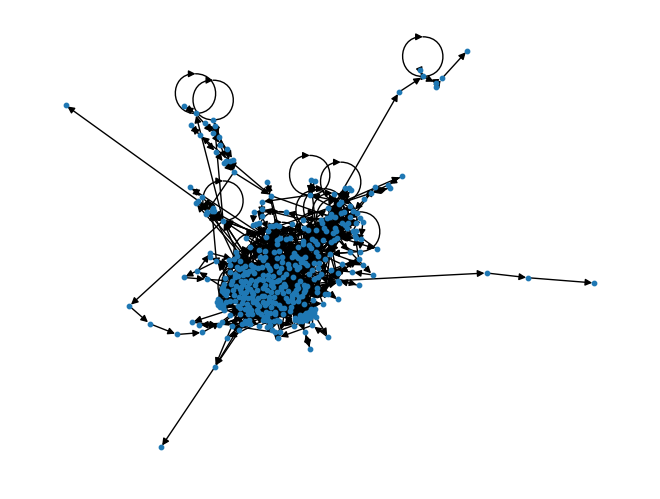

In [9]:
nx.draw(Graphs_by_key['CMajor'], node_size=10)

In [10]:
with open('TrainedNetworks/Graphs_by_key.pkl', 'wb') as f:
    pickle.dump(Graphs_by_key, f)